In [2]:
import risk
reload(risk)

<module 'risk' from 'risk.pyc'>

In [125]:
import random, numpy, math, os
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
regions = graph.regions()

In [127]:
random.sample(regions, 10)

[Region(venezuela),
 Region(ontario),
 Region(egypt),
 Region(south-africa),
 Region(northwest-territory),
 Region(middle-east),
 Region(east-africa),
 Region(iceland),
 Region(western-australia),
 Region(ukraine)]

In [128]:
def full_continents(my_regions):
    retval = [ ]
    for continent, regions in risk.continents.items():
        n_regions = len(regions)
        n_my_regions = len([r for r in my_regions if r.continent() == continent])
        if n_regions == (n_my_regions):
            retval.append(continent)
    return retval
def new_armies(my_regions):
    retval = max(3, int(math.floor(len(my_regions)/3)))
    for continent in full_continents(my_regions):
        retval += risk.continent_bonus[continent]
    return retval

In [129]:
def safe_nodes(my_regions):
    retval = 0
    for r in my_regions:
        safe = True
        for n in r.neighbors():
            if not n in [x.name for x in my_regions]:
                safe = False
                break
        retval += safe
    return retval

In [130]:
new_armies(random.sample(regions, 42))

38

In [131]:
safe_nodes(random.sample(regions, 42))

42

(array([   35.,   429.,  1495.,  2543.,  1470.,  2190.,  1248.,   460.,
          112.,    18.]),
 array([  0. ,   1.8,   3.6,   5.4,   7.2,   9. ,  10.8,  12.6,  14.4,
         16.2,  18. ]),
 <a list of 10 Patch objects>)

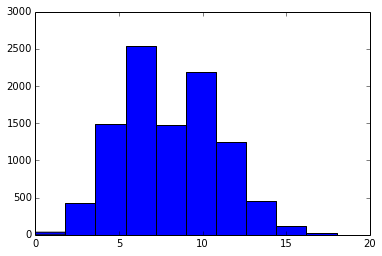

In [132]:
plt.hist([safe_nodes(random.sample(regions, 30)) for i in range(10000)], bins=10)
    

In [133]:
def find_max(regions, sample_size=21, n=1000, fct=new_armies):
    max_result  = -1e9
    best_sample = None
    for i in range(n):
        sample = random.sample(regions, sample_size)
        result = fct(sample)
        if result > max_result:
            max_result = result
            best_sample = sample
    return max_result, best_sample
            

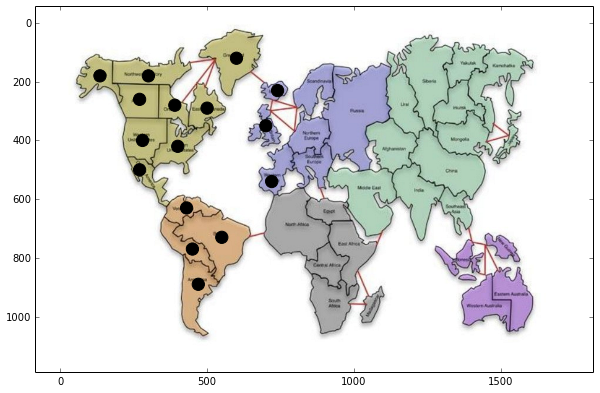

In [103]:
locations = { 
    'venezuela': [430, 630],
    'alaska': [135, 180],
    'northern territory': [300, 180],
    'alberta': [270, 260],
    'mexico' : [270, 500],
    'ontario' : [390, 280],
    'greenland' : [600, 120],
    'quebec' : [500, 290],
    'eastern united states' : [400, 420],
    'western united states' : [280, 400],
    'brazil' : [550, 730],
    'peru' : [450, 770],
    'argentina' : [470, 890],
    'iceland' : [740, 230],
    'united kingdom' : [700, 350],
    'western europe' : [720, 540]
}

im = plt.imread(os.getcwd() + '/risk.png')
plt.figure(figsize = (10,15))
implot = plt.imshow(im)
for l, coor in locations.items():
    plt.scatter([coor[0]], [coor[1]], s = 150, c = 'black') # alaska
plt.show()

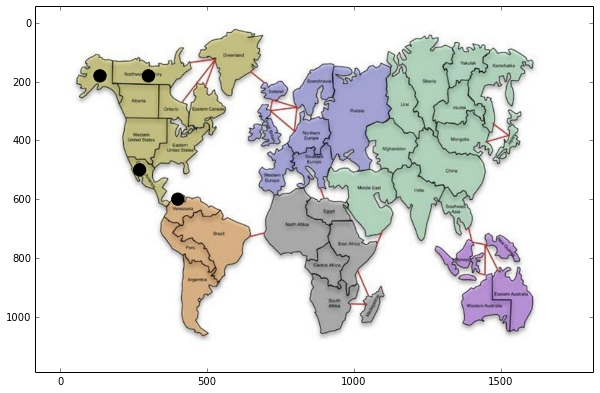

In [65]:
im = plt.imread(os.getcwd() + '/risk.png')
plt.figure(figsize = (10,15))
implot = plt.imshow(im)
for l, coor in locations.items():
    plt.scatter([coor[0]], [coor[1]], s = 150, c = 'black') # alaska
plt.show()